In [1]:
# import the different libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Sarimax ML Model

In [2]:
#open csv file
Data = pd.read_csv('C:/Users/pooja/OneDrive/Desktop/Sales Forecasting/4. Modeling/Retail Data_Modeling_Arima.csv')
Data

,Unnamed: 0,Store_id,Sales_Date,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Store_Dept,Weekly_Sales,Store_Type,Store_Size,Sales_Month,Sales_Year,Fuel_Price
0,0,1,2010-02-05,42.31,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315,2,2010,2.572
1,330761,35,2010-02-05,27.19,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,3,14612.19,B,103681,2,2010,2.784
2,330762,35,2010-02-05,27.19,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,4,26323.15,B,103681,2,2010,2.784
3,330763,35,2010-02-05,27.19,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,5,36414.63,B,103681,2,2010,2.784
4,330764,35,2010-02-05,27.19,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,6,11437.81,B,103681,2,2010,2.784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,128051,13,2012-10-26,46.97,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,49,7770.71,A,219622,10,2012,3.755
421566,128052,13,2012-10-26,46.97,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,50,1486.00,A,219622,10,2012,3.755
421567,128053,13,2012-10-26,46.97,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,52,4738.93,A,219622,10,2012,3.755
421568,390991,41,2012-10-26,41.80,4864.30,101.34,250.6,47.24,1524.43,199.219532,6.195,False,4,32699.78,A,196321,10,2012,3.686


In [3]:
#Change date to datetime formatData
Data['Sales_Date']=pd.to_datetime(Data['Sales_Date'])

In [4]:
Data = Data.drop(['Unnamed: 0'],axis=1)

In [5]:
#grab the colum that require for forecasting
Data1 = Data[["Sales_Date","Weekly_Sales"]]
#Data1

In [6]:
#Data1.info()

<AxesSubplot:>

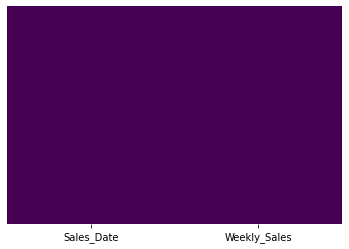

In [7]:
#Make sure there are no null values
sns.heatmap(Data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#Data1.set_index('Sales_Date',inplace=True)

In [9]:
#Data1.shape

In [10]:
#Data1

In [11]:
#lest take sum of the sales of different department and stores and do some analysis on monthly total sales
#sum of sales based on date
df_average_sales_week = Data.groupby(by=['Sales_Date'], as_index=False)['Weekly_Sales'].sum()
# sort the values
df_average_sales = df_average_sales_week.sort_values('Sales_Date', ascending=False)

In [12]:
df_average_sales

,Sales_Date,Weekly_Sales
142,2012-10-26,45544116.29
141,2012-10-19,45122410.57
140,2012-10-12,46128514.25
139,2012-10-05,47566639.31
138,2012-09-28,43734899.40
...,...,...
4,2010-03-05,46871470.30
3,2010-02-26,43968571.13
2,2010-02-19,48276993.78
1,2010-02-12,48336677.63


In [13]:
#plt.figure(figsize=(20,5))
#plt.plot(df_average_sales_week.Sales_Date, df_average_sales_week.Weekly_Sales)
#plt.show()

<AxesSubplot:xlabel='Sales_Date', ylabel='Weekly_Sales'>

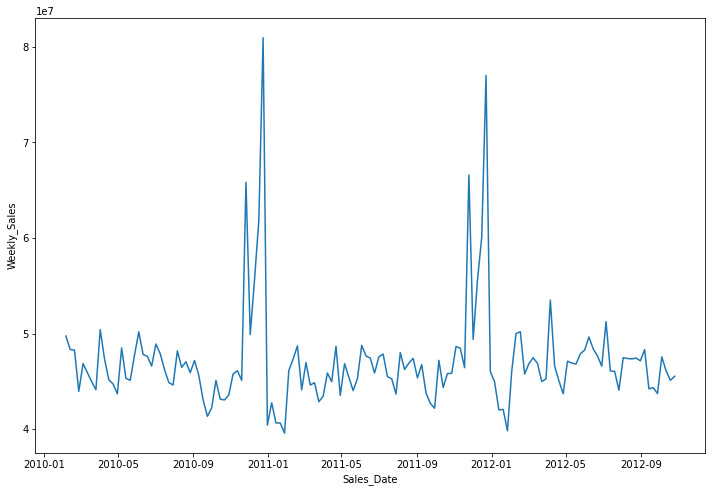

In [14]:
# To understand the pattern
plt.figure(figsize=(12,8))
sns.lineplot(data=df_average_sales, x='Sales_Date', y= 'Weekly_Sales')

In [15]:
data2 = df_average_sales_week.set_index('Sales_Date')
data2

,Weekly_Sales
Sales_Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


In [16]:
data2

,Weekly_Sales
Sales_Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


In [17]:
#data2.info()

In [18]:
#for backup
#ts.to_csv('C:/Users/pooja/OneDrive/Desktop/We cloud/ML/Project #2/test2.csv')

In [19]:
from statsmodels.tsa.stattools import adfuller

C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


#### Check dickey fuller test to see if the data is stationary or not

In [20]:
test_result = adfuller(data2['Weekly_Sales'])

In [21]:
#Ho : it is not stationary
#H1 : it is stationary

def adfuller_test(Weekly_Sales):
    result = adfuller(Weekly_Sales)
    labels=['ADF Test Statistic','P-value','#lags used','Number of observation used']
    for value,labels in zip(result,labels):
        print(labels+' : '+str(value) )
    if result[1]<=0.05:
        print("Reject null hypothesis(- it is stationary) ")
    else:
        print("Accept null hypothesis (- it is not stationary)")

In [22]:
adfuller_test(data2["Weekly_Sales"])

ADF Test Statistic : -5.908297957186334
P-value : 2.675979158986027e-07
#lags used : 4
Number of observation used : 138
Reject null hypothesis(- it is stationary) 


##### Based on above test we can see our data is stationary

In [23]:
#Spliting the dataset into train and test
train = data2[:133]
test = data2[-10:]

Text(0, 0.5, 'Weekly_Sales')

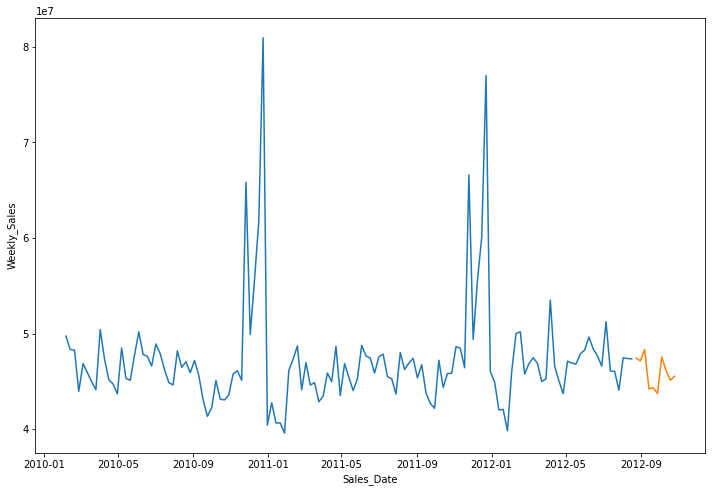

In [24]:
plt.figure(figsize=(12,8))
plt.plot(train)
plt.plot(test)
plt.xlabel('Sales_Date')
plt.ylabel('Weekly_Sales')

In [25]:
import statsmodels.api as sm

In [26]:
#model = sm.tsa.statespace.SARIMAX(train,order=(0,1,1),seasonal_order=(1,0,0,12))
#model1 = model.fit()
model = sm.tsa.statespace.SARIMAX(data2['Weekly_Sales'],order=(1,1,1),seasonal_order=(1,0,0,12))
result = model.fit()

C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'


In [27]:
#Summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -2407.130
Date:                             Sat, 23 Apr 2022   AIC                           4822.259
Time:                                     17:12:24   BIC                           4834.082
Sample:                                 02-05-2010   HQIC                          4827.064
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4540      0.067      6.795      0.000       0.323       0.585
ma.L1         -0.9757      0.039    -24.996      0.000      -1.052      -0.899
ar.S.L12      -0.0280      0.165     -0.170      0.865      -0.351       0.295
sigma2      3.067e+13   6.27e-15   4.89e+27      0.000    3.07e+13    3.07e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):               519.62
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             1.36
Prob(H) (two-sided):                  0.01   Kurtosis:                        11.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.96e+42. Standard errors may be unstable.
"""

In [28]:
result.predict()

2010-02-05    0.000000e+00
2010-02-12    3.618978e+07
2010-02-19    3.816043e+07
2010-02-26    3.992887e+07
2010-03-05    3.858484e+07
                  ...     
2012-09-28    4.574247e+07
2012-10-05    4.561560e+07
2012-10-12    4.733843e+07
2012-10-19    4.671045e+07
2012-10-26    4.609537e+07
Freq: W-FRI, Name: predicted_mean, Length: 143, dtype: float64

In [29]:
#prediction of the provided sales date
prediction = pd.DataFrame(result.predict(),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Sales_Date,
2012-08-24,4.730096e+07
2012-08-31,4.731333e+07
2012-09-07,4.723102e+07
2012-09-14,4.779421e+07
2012-09-21,4.586464e+07
2012-09-28,4.574247e+07
2012-10-05,4.561560e+07
2012-10-12,4.733843e+07
2012-10-19,4.671045e+07


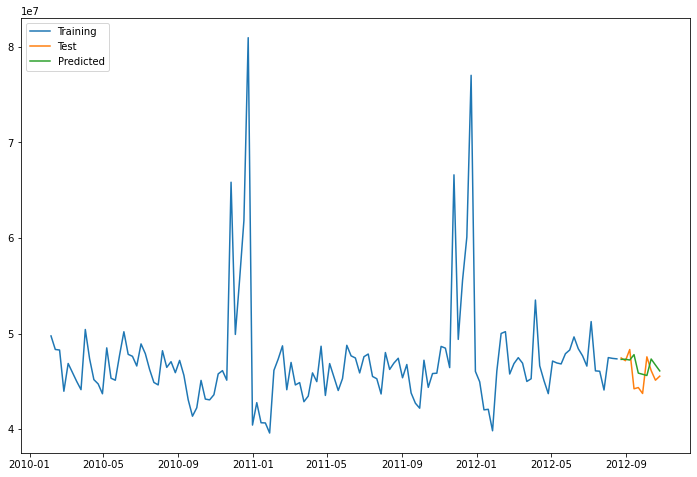

In [30]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

from statsmodels.tsa.arima.model import ARIMA

C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'


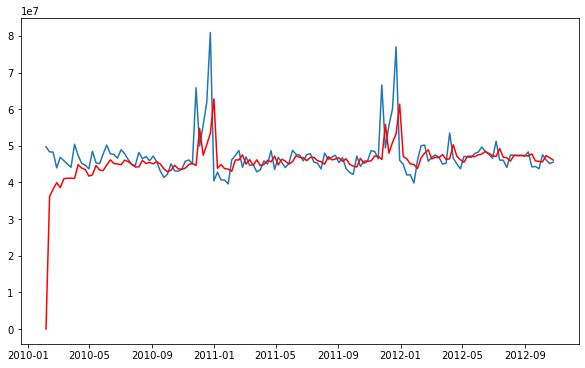

In [32]:
# AR+I+MA = ARIMA model

model = sm.tsa.statespace.SARIMAX(data2['Weekly_Sales'],order=(1,1,1),seasonal_order=(1,0,0,12))
result_sarimax = model.fit()



#model = ARIMA(data2, order=(1,1,0))
#results_ARIMA = model.fit()
plt.plot(data2)
plt.plot(result_sarimax.fittedvalues, color='red')
#plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
#print('Plotting ARIMA model')

In [33]:
predictions_SARIMAX_diff = pd.Series(result_sarimax.fittedvalues, copy=True)
print(predictions_SARIMAX_diff.head())

Sales_Date
2010-02-05    0.000000e+00
2010-02-12    3.618978e+07
2010-02-19    3.816043e+07
2010-02-26    3.992887e+07
2010-03-05    3.858484e+07
dtype: float64


In [34]:
#Convert to cumulative sum
predictions_SARIMAX_diff_cumsum = predictions_SARIMAX_diff.cumsum()
print(predictions_SARIMAX_diff_cumsum)

Sales_Date
2010-02-05    0.000000e+00
2010-02-12    3.618978e+07
2010-02-19    7.435021e+07
2010-02-26    1.142791e+08
2010-03-05    1.528639e+08
                  ...     
2012-09-28    6.349143e+09
2012-10-05    6.394759e+09
2012-10-12    6.442097e+09
2012-10-19    6.488807e+09
2012-10-26    6.534903e+09
Length: 143, dtype: float64


In [35]:
predictions_SARIMAX_log = pd.Series(data2['Weekly_Sales'].iloc[0], index=data2.index)
predictions_SARIMAX_log = predictions_SARIMAX_log.add(predictions_SARIMAX_diff_cumsum, fill_value=0)
predictions_SARIMAX_log.tail()

Sales_Date
2012-09-28    6.398894e+09
2012-10-05    6.444509e+09
2012-10-12    6.491848e+09
2012-10-19    6.538558e+09
2012-10-26    6.584654e+09
dtype: float64

C:\Users\pooja\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


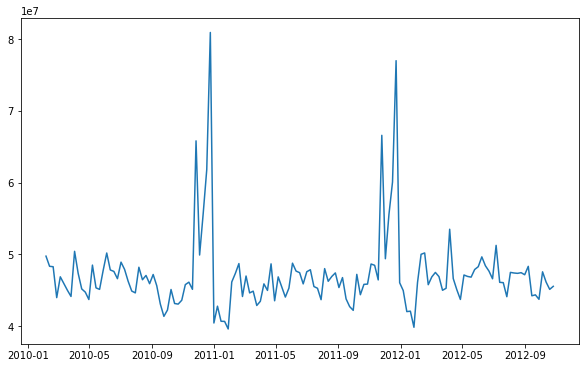

In [36]:
# Inverse of log is exp.
predictions_SARIMAX = np.exp(predictions_SARIMAX_log)
plt.plot(data2)
plt.plot(predictions_SARIMAX)

In [37]:
#predict forecast values

index_future_dates = pd.date_range(start='2012-11-02', end='2013-02-19',freq='W')
pred = result_sarimax.predict(start=104,end=119,typ='levels')
pred.index = index_future_dates
print(pred)

2012-11-04    4.379484e+07
2012-11-11    4.674360e+07
2012-11-18    4.801561e+07
2012-11-25    4.889128e+07
2012-12-02    4.641456e+07
2012-12-09    4.687197e+07
2012-12-16    4.675254e+07
2012-12-23    4.757385e+07
2012-12-30    4.628196e+07
2013-01-06    4.645222e+07
2013-01-13    5.032195e+07
2013-01-20    4.717478e+07
2013-01-27    4.621333e+07
2013-02-03    4.550652e+07
2013-02-10    4.713762e+07
2013-02-17    4.716857e+07
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [38]:
#predict forecast values and actual value combine

future_df=pd.concat([data2,pred])
future_df.rename(columns={0:"predict"},inplace=True)
future_df

,Weekly_Sales,predict
2010-02-05,49750740.50,NaN
2010-02-12,48336677.63,NaN
2010-02-19,48276993.78,NaN
2010-02-26,43968571.13,NaN
2010-03-05,46871470.30,NaN
...,...,...
2013-01-20,NaN,4.717478e+07
2013-01-27,NaN,4.621333e+07
2013-02-03,NaN,4.550652e+07
2013-02-10,NaN,4.713762e+07


<AxesSubplot:>

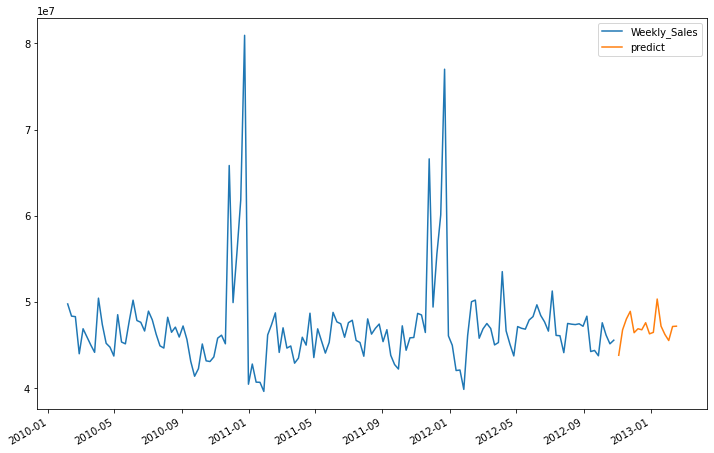

In [39]:
#Actual and forecast predictions

future_df[['Weekly_Sales', 'predict']].plot(figsize=(12, 8))